## Use Eval to identify diffs and plot them in detail

Use the following pattern to iterate and find improvements
    
    eval(vid_fn=v, algo_enum=a) -> OutcomeData(v,a)
    
    TrackFactory(algo_enum=0), TrackFactory(algo_enum=2) -> a1, a2

    CmpAlgoReport( OutcomeData(v, a1), OutcomeData(v, a2) )
  
    .largestDiscrepancy(metric_m = <-1,0,1>) -> frame_ind_list
    
    subprocBathcOutput(vid_fn = v, frame_ind_list) -> listGS
    
    [a1, a2] -> listTrackers
   
    compareTrackers(listGS, listTrackers) -> output plot

In [65]:
import pandas as pd
import sqlalchemy
import math
import os, sys, copy, random, pickle, cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append("../")

%load_ext autoreload
%autoreload 2

from modules.ControlTracking import TrackFactory
from modules.ControlDisplay import Display
from modules.Interproc import DBInterface, GuiviewState

from modules.AnalysisHelpers import ( 
         exploreImgs, buildImgComparisonData, subprocEval,
        subprocBatchOutput, cvtPlot, applyTracker,
        roiSelectScoreWindow, multiPlot)

from modules.EvalHelpers import EvalTracker, EvalDataset
from modules.ControlEval import EvalFactory
from modules.DataSchemas import ScoreSchema
from modules.EvalHelpers import OutcomeData, DFHelper

from modules.EvalHelpers import AggEval, DFHelper

from modules.EvalSuite import EvalSuite, CmpAlgoReport

from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Data

In [7]:
db_path = 'data/misc/books/eval-report-3/'

outcome_0 = OutcomeData(dbPathFn = db_path + 'algo_0.db')
outcome_1 = OutcomeData(dbPathFn = db_path + 'algo_1.db')
outcome_2 = OutcomeData(dbPathFn = db_path + 'algo_2.db')

In [8]:
cmpA = CmpAlgoReport(benchmark_outcome_data = outcome_0.getOutcome(), 
                     current_outcome_data = outcome_2.getOutcome()
                    )

### Get Discrepancies

In [16]:
ret = cmpA.largestDiscrepancy(calcBaselineBallUnitsAway=0)
display(ret[:6])
foi = [int(x) for x in ret.index]
print foi[:5]

vid_fn = 'data/proc/tmp/dec14/output5.proc1.proc1.avi'
listGS = subprocBatchOutput(vid_fn, batch_list = foi[:6])

def discrepancyLookup(frame_counter):
    try:
        return foi.index(frame_counter)
    except:
        return 0

listGS.sort(key=lambda item: discrepancyLookup(item.frameCounter))
print [gs.frameCounter for gs in listGS]

,diff,current,benchmark
,calcBaselineBallUnitsAway,calcBaselineBallUnitsAway,calcBaselineBallUnitsAway
295,0.443,-0.500,-0.943
215,0.298,-0.375,-0.673
187,0.143,-0.530,-0.673
195,0.125,-0.375,-0.500
78,-0.057,-0.085,-0.028
307,0.045,-0.714,-0.759


[295, 215, 187, 195, 78]
[295, 215, 187, 195, 78, 307]


### Show Differences in Plot Transforms

In [120]:
from modules.AnalysisHelpers import compareTrackers

In [108]:
itemsTrackers = d_trackers.items()
itemsTrackers.sort(key=lambda elem: elem[0], reverse = False)
display(itemsTrackers)
listTrackers = [elem[1] for elem in itemsTrackers]

[('0', <modules.ControlTracking.TrackFactory instance at 0x0A7CD850>),
 ('1', <modules.ControlTracking.TrackFactory instance at 0x094B4FA8>),
 ('2', <modules.ControlTracking.TrackFactory instance at 0x09DBD788>)]

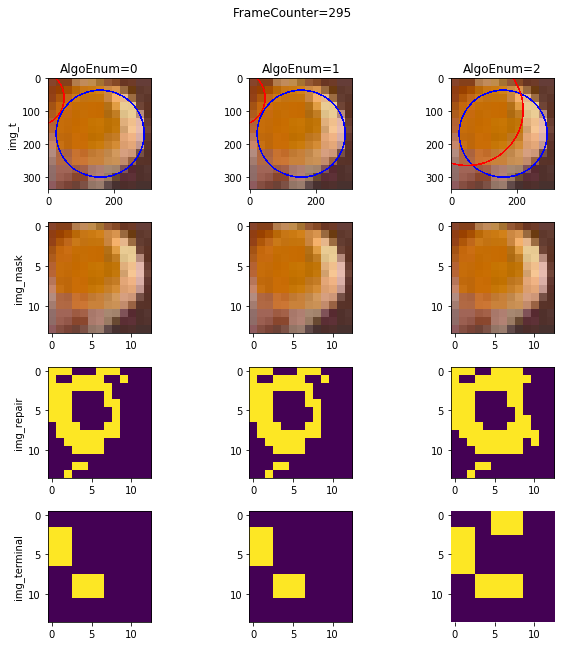

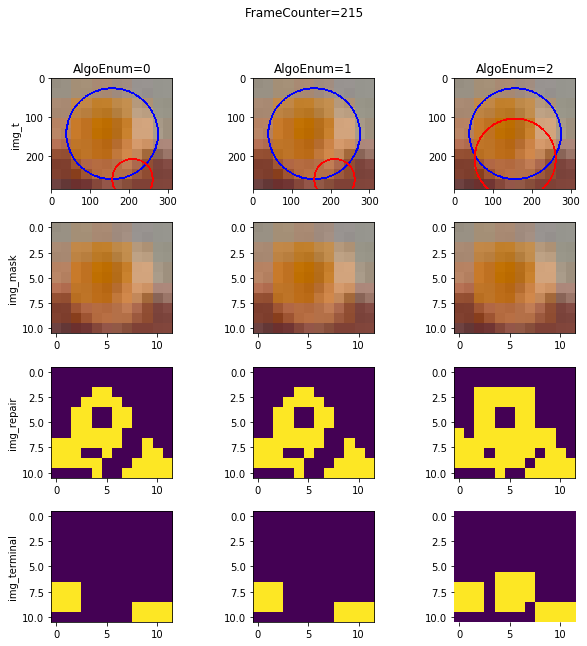

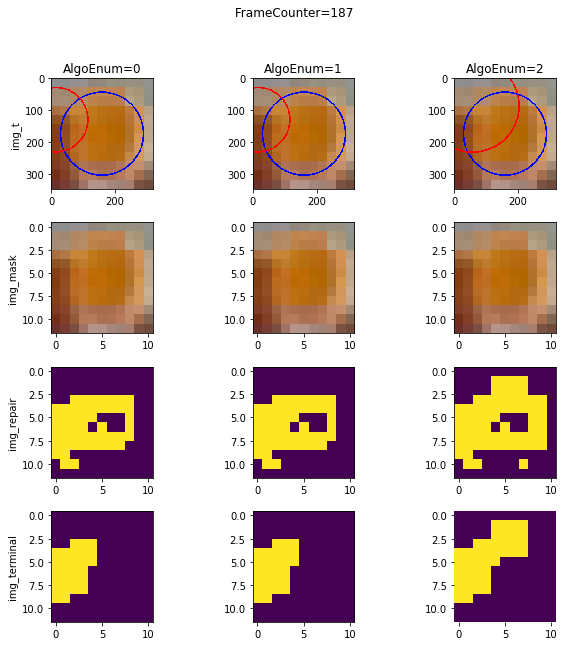

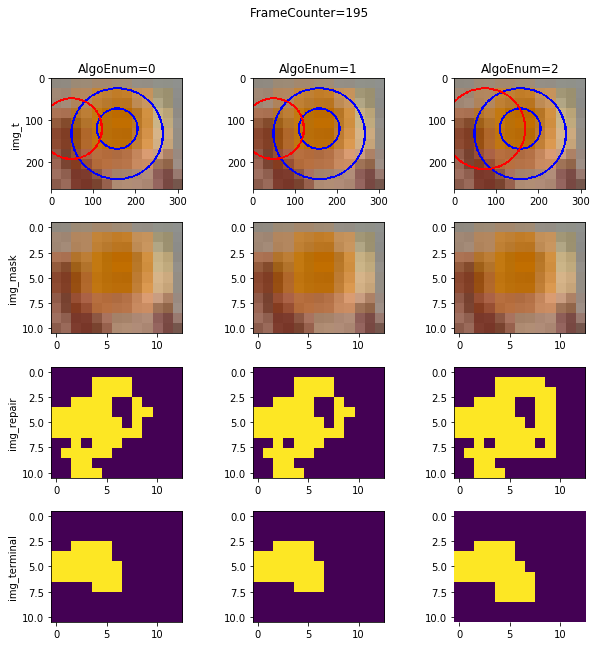

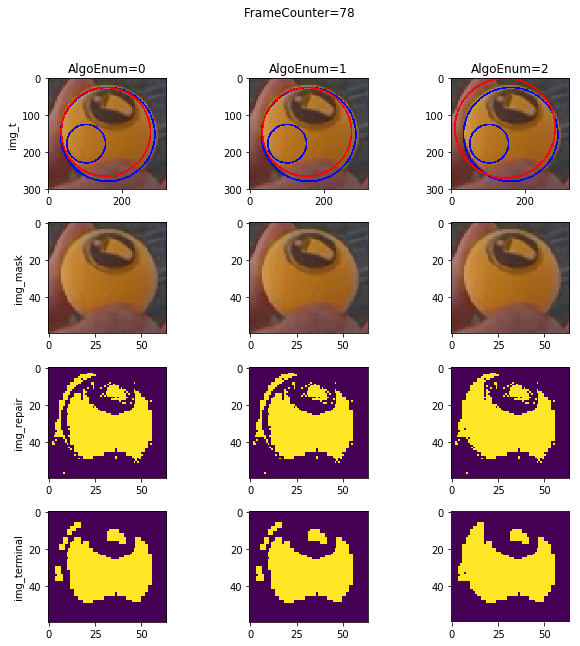

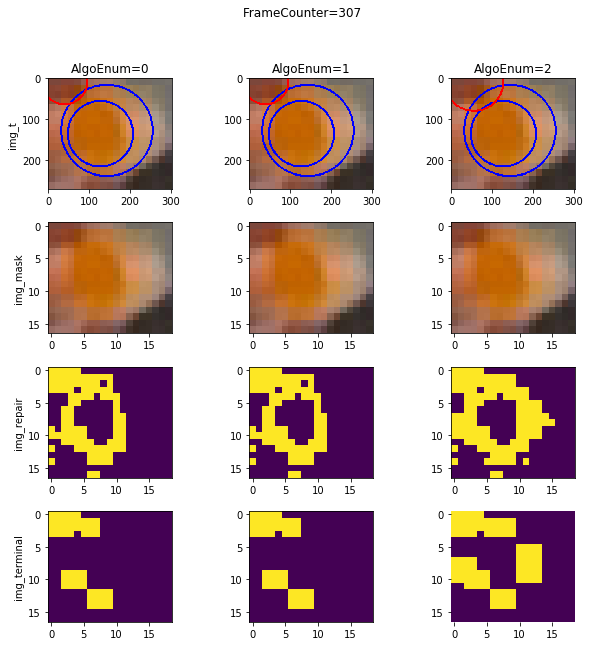

In [121]:
compareTrackers( listGS=listGS
                ,listTrackers=listTrackers
                ,roiSelectFunc=roiSelectScoreWindow)
#                 ,roiSelectFunc=None)